# I : Représentation des Séries Temporelles en Python


### **Objectif du cette section :**
L'objectif de cette section est d'introduire les concepts de base liés aux séries temporelles en utilisant le langage de programmation Python. Nous allons également explorer la manipulation de données temporelles à l'aide d'une base de données open source.

## **Partie 1 : Téléchargement et Exploration des Données**

1. Importer seaborn et statsmodels

In [7]:
import seaborn as sns
import statsmodels.api as sm

# Que faire avec statsmodels ?
La bibliothèque Statsmodels est une bibliothèque **Python** qui offre des outils et des modèles pour **l'analyse statistique et la modélisation de données**.

[Lien de Statsmodels](https://www.statsmodels.org/stable/tsa.html)

2. Importer pandas et matplotlib.pyplot

In [8]:
import pandas as pd
import matplotlib.pyplot as plt



3. Charger la base de données **flights**
 de seaborn avec la fonction **load_dataset**

In [9]:
flights = sns.load_dataset("flights")


4. Affichez les premières lignes du jeu de données pour comprendre sa structure.




In [5]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## **Partie 2 : Représentation des Séries Temporelles**


5. Convertissez la colonne temporelle en format de date approprié (datetime).
Il faut créer  une nouvelle colonne **"date"** qui donne chaque date.

In [ ]:
flights["date"] = pd.to_datetime(flights["year"].astype(str) + "-" + flights["month"].astype(str))


6. Affichez les premières lignes du jeu de données pour comprendre sa structure

In [10]:
flights.head()


,year,month,passengers,date
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


*7*. Tracez la série temporelle avec le nom : **Évolution du Nombre de Passagers au Fil du Temps** avec lineplot().


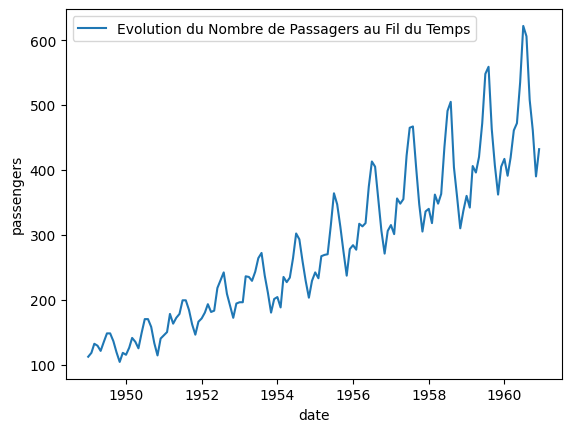

In [11]:
sns.lineplot(data=flights, x="date", y="passengers", label="Evolution du Nombre de Passagers au Fil du Temps")
plt.show()


8. Presenter des composants de base.
* Importer seasonal_decompose de statsmodels.tsa.seasonal
* **Décomposition de séries temporelles** : Pour séparer une série temporelle en ses composantes de tendance, saisonnière et résiduelle, la bibliotheque statsmodels presente la fonction **statsmodels.tsa.seasonal.seasonal_decompose**



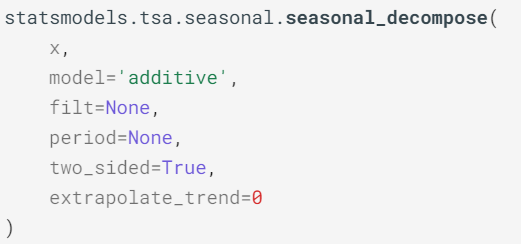

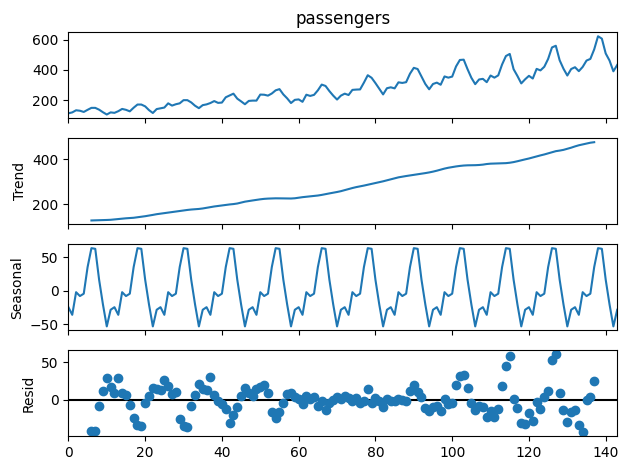

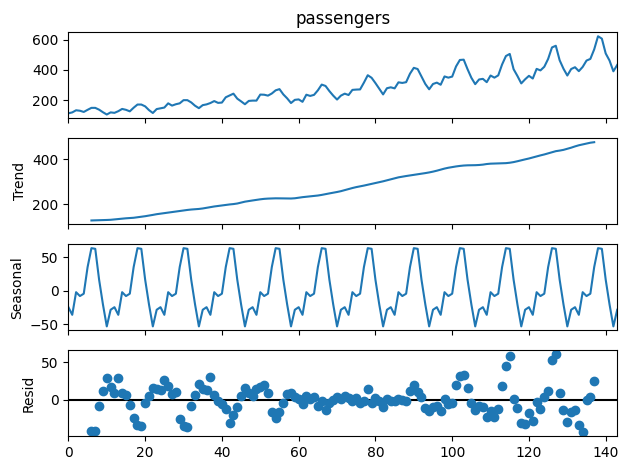

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
dec = seasonal_decompose(flights['passengers'], period = 12, model='additive')
dec.plot( )

9. Modifier le modèle

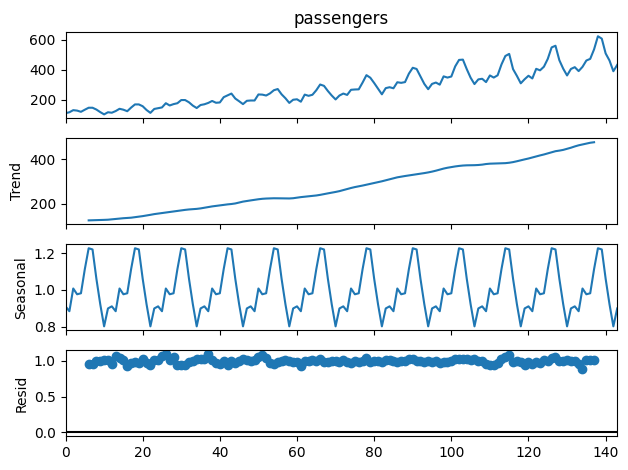

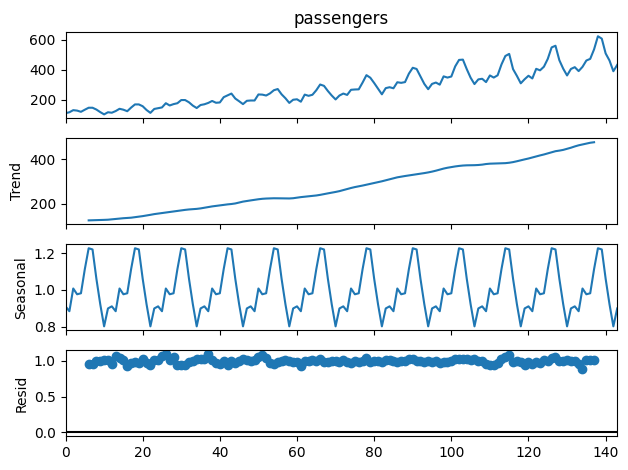

In [18]:
dec = seasonal_decompose(flights['passengers'], period = 12, model='multiplicative')
dec.plot( )

# II- Lissage de Séries Temporelles en Python
### **Objectif du TP :**
L'objectif de cette section est de familiariser les étudiants avec les techniques de lissage des séries temporelles en utilisant Python. Nous allons utiliser une base de données open source pour importer une série temporelle, puis nous allons appliquer différentes méthodes de lissage pour obtenir des séries lissées. Enfin, nous comparerons graphiquement les résultats avec la série temporelle d'origine.

## **Partie 2 : Lissage par Moyenne Mobile Simple**

1. Appliquer le lissage par moyenne mobile simple (unilatéral) sur la série temporelle.
* Utiliser **.rolling(window=X)**: Cela crée une fenêtre roulante de longueur X sur les  données de la colonne. Cela signifie que pour chaque point de données, la fenêtre inclura les X points de données précédents (y compris le point de données actuel).


In [19]:
flights['moyenne_Mobile_simple'] = flights['passengers'].rolling(window=12).mean()

2. Afficher le graphe de comparaison de la série temporelle avec la moyenne mobile simple (unilatérale)

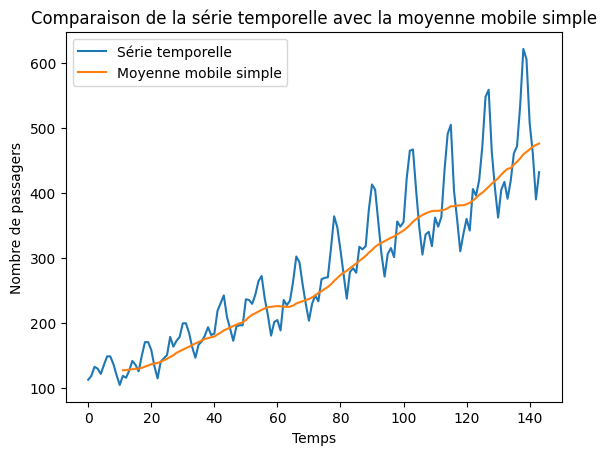

In [22]:

plt.plot(flights['passengers'], label='Série temporelle')
plt.plot(flights['moyenne_Mobile_simple'], label='Moyenne mobile simple')
plt.xlabel('Temps')
plt.ylabel('Nombre de passagers')
plt.title('Comparaison de la série temporelle avec la moyenne mobile simple')
plt.legend()
plt.show()


3. Appliquer le lissage par moyenne mobile simple (centré) sur la série temporelle.


In [23]:

flights['moyenne_Mobile_simple_centree'] = flights['passengers'].rolling(window=12, center=True).mean()


4. Afficher le graphe de comparaison de la série temporelle avec la moyenne mobile simple (centrée)

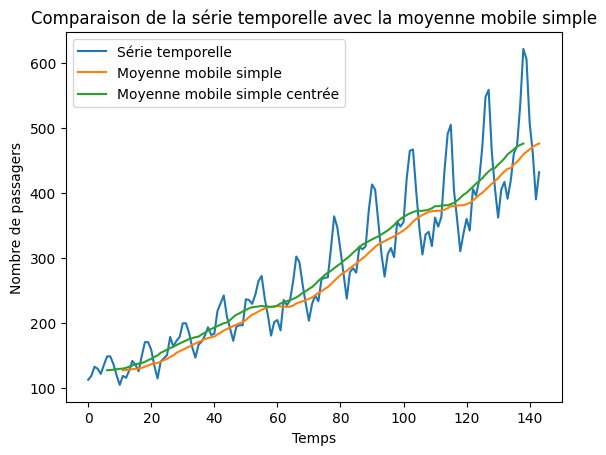

In [24]:
plt.plot(flights['passengers'], label='Série temporelle')
plt.plot(flights['moyenne_Mobile_simple'], label='Moyenne mobile simple')
plt.plot(flights['moyenne_Mobile_simple_centree'], label='Moyenne mobile simple centrée')
plt.xlabel('Temps')
plt.ylabel('Nombre de passagers')
plt.title('Comparaison de la série temporelle avec la moyenne mobile simple')
plt.legend()
plt.show()



## **Partie 3 : Lissage Exponentiel**


5. Appliquer le lissage exponentiel sur la série temporelle en utilisant : **.ewm(alpha=X).mean()**


*   **.ewm()** : créer un objet de lissage exponentiel pondéré en utilisant la méthode ewm (exponential weighted moving) de la série temporelle.
*   **Alpha** spécifie le facteur de lissage.




In [30]:
flights['lissage_exponentiel'] = flights['passengers'].ewm(alpha=0.2 ).mean()

6. Afficher le graphe de comparaison de la série temporelle avec la serie lissée.

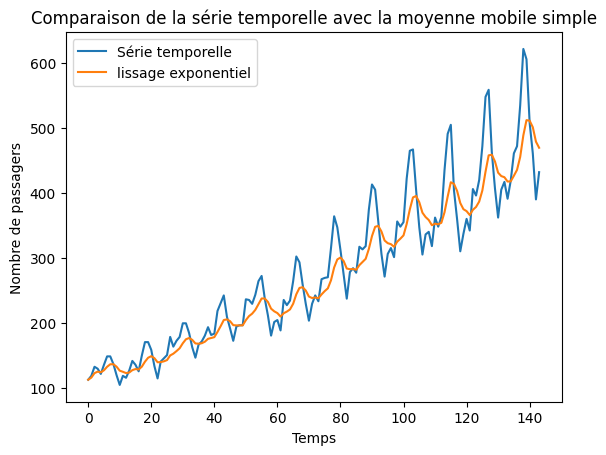

In [31]:
plt.plot(flights['passengers'], label='Série temporelle')
plt.plot(flights['lissage_exponentiel'], label='lissage exponentiel')
plt.xlabel('Temps')
plt.ylabel('Nombre de passagers')
plt.title('Comparaison de la série temporelle avec la moyenne mobile simple')
plt.legend()
plt.show()
